In [2]:
%matplotlib inline

In [60]:
import statsmodels.datasets as dt
import statsmodels.api as sm
from scipy.stats.mstats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize
import numpy as np

sns.set()
sns.set_context('talk')

In [33]:
input_raw = dt.get_rdataset('Boston', 'MASS').data

In [34]:
input_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
input_raw.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
input_raw1 = po.DataFrame(zscore(input_raw), columns=input_raw.columns)

In [42]:
model = sm.OLS(input_raw['medv'], input_raw.drop('medv', axis=1)).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Sat, 06 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:10:52   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
zn             0.0487      0.014      3.382      0.001       0.020       0.077
indus         -0.0041      0.064     -0.063      0.950      -0.131       0.123
chas           2.8540      0.904      3.157      0.002       1.078       4.630
nox           -2.8684      3.359     -0.854      0.394      -9.468       3.731
rm             5.9281      0.309     19.178      0.000       5.321       6.535
age           -0.0073      0.014     -0.526      0.599      -0.034       0.020
dis           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
rad            0.1712      0.067      2.564      0.011       0.040       0.302
tax           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
ptratio       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
black          0.0149      0.003      5.528      0.000       0.010       0.020
lstat         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

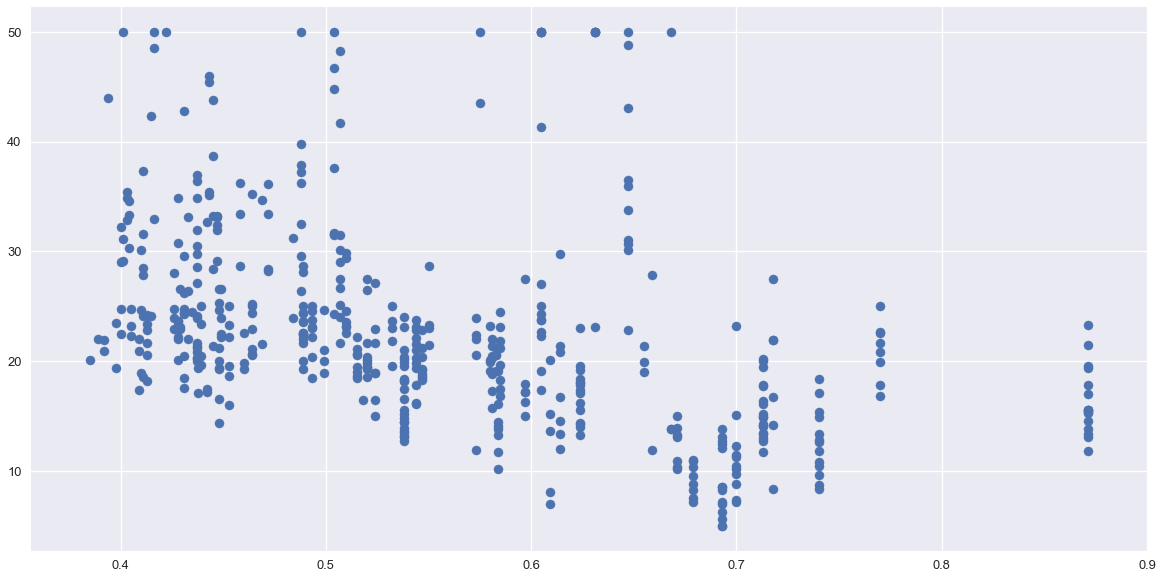

In [52]:
fig = plt.figure(figsize=[20,10])
plt.scatter(input_raw['nox'], input_raw['medv'])

Minimize/Maximize y,
by changing x1, x2, x3, ...

Such that,

0 <= x1 <= 10
0 <= x2 <= 10
0 <= x3 <= 10

x1 + x2 + x3 = 21

In [64]:
data = input_raw.loc[[0, 1], :].copy()

In [83]:
def obj_fun(nox_iter):
    data.loc[0, 'nox'] = nox_iter
    return model.predict(data.drop('medv', axis=1))[0]

In [84]:
b_ = [(0.45, 0.62)]

In [85]:
optimal_result = minimize(obj_fun, np.random.rand(), bounds=b_)

In [86]:
optimal_result

      fun: 28.863051747723397
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.86843616])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([ 0.62])